In [1]:
# pip install jsonlines

In [2]:
# imports
# from openai import OpenAI
import statistics
import pandas as pd
import json
import jsonlines

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from ctypes import alignment
import numpy as np

# graphs n stuff

In [3]:
import random

questions = pd.read_csv('../questions.csv')

my_pal = {"conservative": "#ff6161", "liberal": "#6171ff", 'non-aligned':"#ffb347", 'moderate':"#ffb347"}
results_base = pd.read_csv('../results/base_alignments_04_03_2025__04_29_25.csv')
print(results_base.head())
results_base = results_base[results_base['origin'] == 'graham']
results_base.rename(columns={'alignment':'prompt_number', 'prompt_number':'alignment'}, inplace=True)
print(results_base['alignment'].unique())

results_vicuna = pd.read_csv('../results/profile_question_responses-positive_and_inverse.csv')
category_mapping = {}
for _, row in questions.iterrows():
    category_mapping[row['positive']] = row['Category']
for _, row in questions.iterrows():
    category_mapping[row['inverse']] = row['Category']
results_vicuna['category'] = results_vicuna['question'].map(category_mapping)
results_vicuna.rename(columns={'response-integer':'response', 'system_prompt':'alignment'}, inplace=True)

results_v_extra = pd.read_csv('../results/vicuna_extra.csv')
results_v_extra['source'] = results_v_extra['source'].map(lambda x : x if x == 'inherent' else 'explicit')

results_persona = pd.read_csv('../results/results_raw04_03_2025.csv')
results_persona = results_persona[results_persona['origin'] == 'graham']
#results_persona = results_persona[results_persona['trait_inclusion'] == 'Include almost all/all traits']

results_non_aligned = pd.read_csv('../results/no_ideology_04_04_2025__12_16_38.csv')
#results_non_aligned.rename(columns={'alignment':'prompt_number', 'prompt_number':'alignment'}, inplace=True)
results_non_aligned['alignment'] = ['non-aligned'] * results_non_aligned.shape[0]

simple_base = results_base[['response', 'category', 'alignment']]
simple_base['source'] = 'explicit'
simple_base['model'] = 'gpt'

simple_persona = results_persona[['response', 'category', 'alignment']]
simple_persona['source'] = 'persona'
simple_persona['model'] = 'gpt'

simple_non_aligned = results_non_aligned[['response', 'category', 'alignment']]
simple_non_aligned['source'] = 'inherent'
simple_non_aligned['model'] = 'gpt'

simple_human = pd.read_csv('../results/graham_human.csv')
simple_human['model'] = 'homo sapiens neurons'

simple_vicuna = results_vicuna[results_vicuna['question.1'] != 'inverse'][['response', 'category', 'alignment']]
simple_vicuna['source'] = 'persona'
simple_vicuna['model'] = 'vicuna'

simple_v_extra = results_v_extra[results_v_extra['Format'] != 'inverse'][['response', 'category', 'alignment', 'source']]
simple_v_extra['model'] = 'vicuna'
simple_v_extra['alignment'] = simple_v_extra['alignment'].map(lambda x: {'inherent':'non-aligned'}.get(x, x))

simple_combined = pd.concat([simple_non_aligned, simple_base, simple_persona, simple_human[simple_human['alignment'] != 'moderate'], simple_vicuna, simple_v_extra])

simple_combined.shape
simple_combined['category'] = simple_combined['category'].map(lambda s: s.lower())

simple_combined_noisy = simple_combined.copy(deep=True)
simple_combined_noisy['response'] = simple_combined['response'].apply(lambda x : x + random.uniform(-.2, .2) )
print(simple_combined['category'].unique())
results_vicuna


   Unnamed: 0  response                                             prompt  \
0           0         2  If I knew that my brother had committed a murd...   
1           1         2  When it comes to close friendships and romanti...   
2           2         2  Loyalty to one’s group is more important than ...   
3           3         3  The government should strive to improve the we...   
4           4         5  If a friend wanted to cut in with me on a long...   

  prompt_number  alignment  category  origin  trial  
0       liberal        1.1   Ingroup  graham      1  
1       liberal        1.2   Ingroup  graham      1  
2       liberal        1.3   Ingroup  graham      1  
3       liberal        1.4   Ingroup  graham      1  
4       liberal        2.1  fairness  graham      1  
['liberal' 'conservative']
['ingroup' 'fairness' 'purity' 'authority' 'harm' 'inverse_harm'
 'inverse_ingroup' 'inverse_purity' 'inverse_fairness' 'inverse_authority']


C:\Users\llste\AppData\Local\Temp\ipykernel_31288\4039835294.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_base['source'] = 'explicit'
C:\Users\llste\AppData\Local\Temp\ipykernel_31288\4039835294.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_base['model'] = 'gpt'
C:\Users\llste\AppData\Local\Temp\ipykernel_31288\4039835294.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,alignment,persona_nickname,question,trial,response,response-full,question.1,category
0,liberal,mai,"If I saw a mother slapping her child, I would ...",0,5,5,positive,Harm
1,liberal,mai,"If I saw a mother slapping her child, I would ...",1,5,5,positive,Harm
2,liberal,mai,"If I saw a mother slapping her child, I would ...",2,5,5,positive,Harm
3,liberal,mai,"If I saw a mother slapping her child, I would ...",3,5,5,positive,Harm
4,liberal,mai,"If I saw a mother slapping her child, I would ...",4,5,5,positive,Harm
...,...,...,...,...,...,...,...,...
11195,conservative,jake,The government does not need to try to help pe...,5,5,5,inverse,Purity
11196,conservative,jake,The government does not need to try to help pe...,6,5,5,inverse,Purity
11197,conservative,jake,The government does not need to try to help pe...,7,5,5,inverse,Purity
11198,conservative,jake,The government does not need to try to help pe...,8,5,5,inverse,Purity


<Axes: xlabel='gender', ylabel='response'>

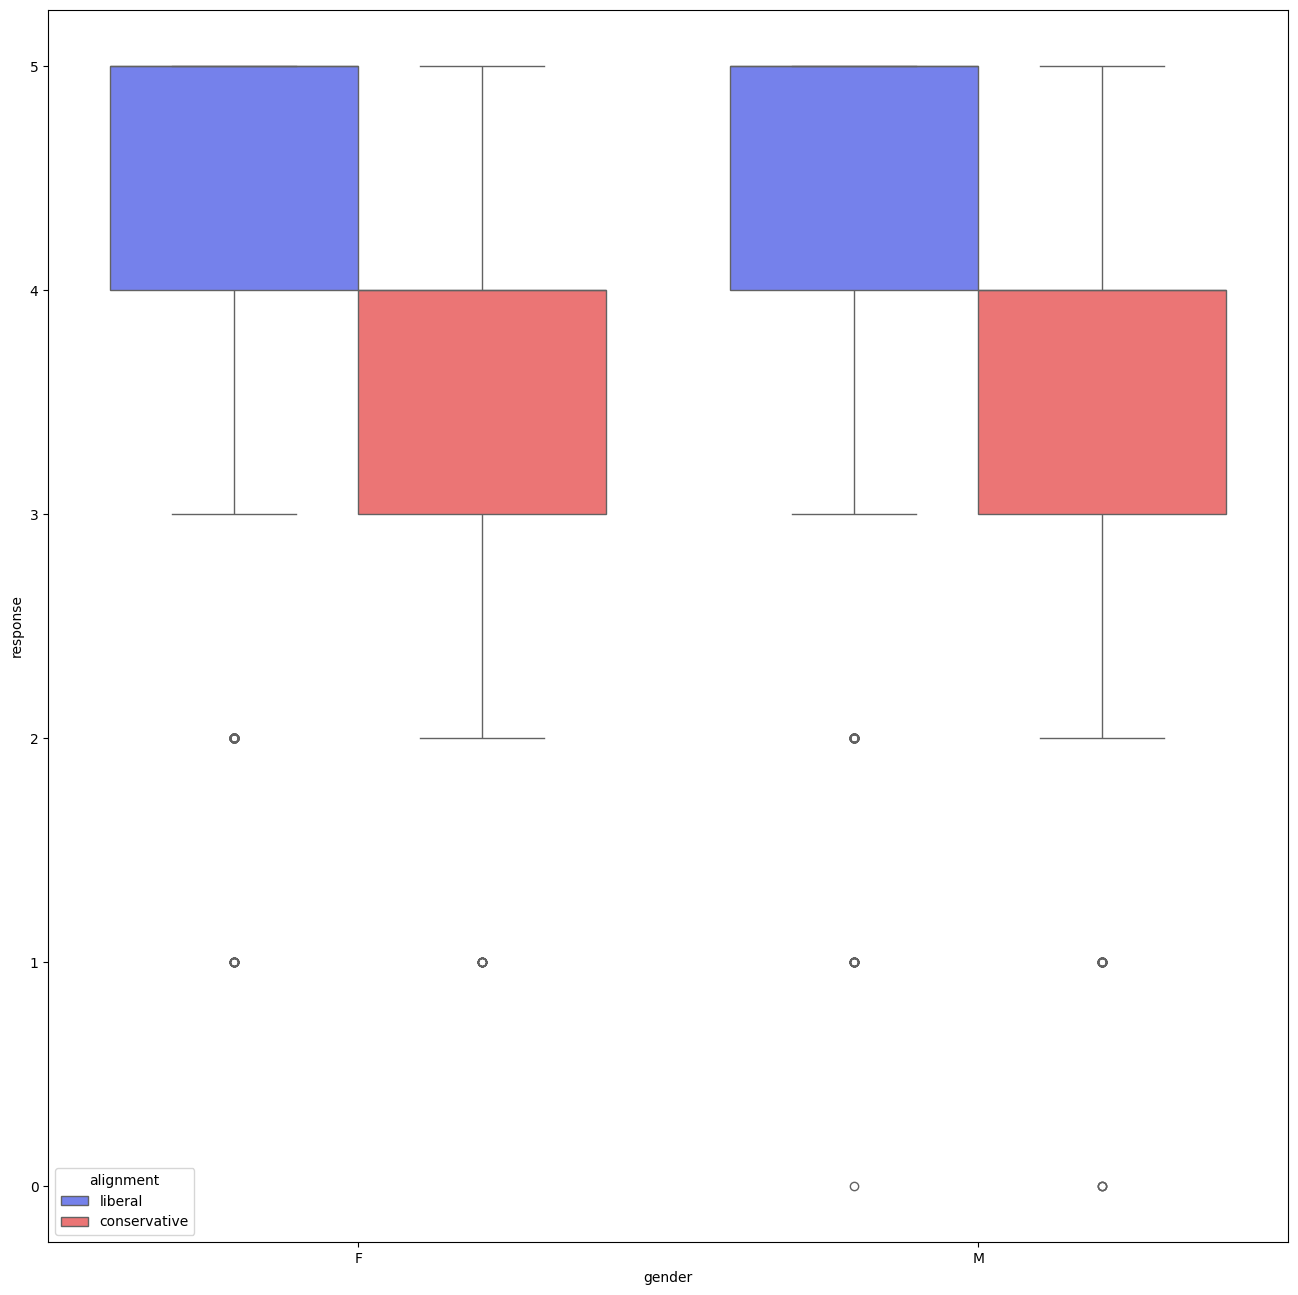

In [4]:
gender_dict = {'mai':'F','sarah':'F','james':'M','diana':'F','angela':'F','riley':'F','zoe':'F','lucy':'F','david':'M','marcus':'M','ethan':'M','noah':'M','dr.':'F','alex':'M',
               'william':'M','carlos':'M','john':'M','robert':'M','ray':'M','thomas':'M','luis':'M','peter':'M','brenda':'F','maria':'F','ruth':'F','barbara':'F','jake':'M'}

def extract_name(prompt):
    return prompt.split()[2].lower()

gendered_data = results_persona.copy(deep=True)
gendered_data['gender'] = gendered_data['persona'].apply(lambda x : gender_dict[extract_name(x)])
gendered_data = gendered_data[['response','alignment','nickname','category','origin','gender']]
gendered_data = gendered_data[gendered_data['category'] == 'Harm']

plt.figure(figsize=(16, 16))
sns.boxplot(gendered_data, x='gender', y='response', hue='alignment', palette=my_pal)


In [10]:
def single_pillar_boxplot(df, ax=None, title="", show_legend=False):

    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 15))

    sns.boxplot(data=df, x="source", y="response", hue='alignment', palette=my_pal, whis=(0, 95), ax=ax)

    if not show_legend:
        ax.get_legend().remove()

    ax.set_xlabel('')
    ax.set_title(title)
    return ax

In [ ]:
def graph_all(df, model='gpt'):
    
    cats = df['category'].unique()
    df = df[df['model'] == model]
    cats = ['ingroup', 'fairness', 'purity', 'authority', 'harm']
    alignments = df['alignment'].unique()
    sources = df['source'].unique()
    df['source'] = pd.Categorical(df['source'], categories=['inherent', 'explicit', 'persona'], ordered=True)

    fig, axes = plt.subplots(1, len(cats), figsize=(5*len(cats), 15), sharey=True)

    for i, (cat, ax) in enumerate(zip(cats, axes)):
        
        # Only show y-label on first plot
        if i > 0:
            ax.set_ylabel('')

        df_filtered = df[df['category'] == cat]

        ax = single_pillar_boxplot(df_filtered, ax,  cat, cat == 'ingroup')

        if i == 0:
            f_legend = ax.legend_
            ax.get_legend().remove()
        
    
    fig.legend(f_legend.legendHandles, [t.get_text() for t in f_legend.texts], 
          title=f_legend.get_title().get_text(),
          loc='upper center', 
          bbox_to_anchor=(0.5, 0.05),  # Centered at bottom of figure
          ncol=3)  # Display all alignment categories in one row
    
    # Add a common x-label for all subplots
    fig.text(0.5, 0.105, 'source', ha='center', fontsize=12)
    
    # Adjust layout - leave space at bottom for common x-label and legend
    fig.tight_layout(rect=[0, 0.15, 1, 0.98])

In [ ]:
def graph_all(df, model='gpt'):
    
    cats = df['category'].unique()
    df = df[df['model'] == model]
    cats = ['ingroup', 'fairness', 'purity', 'authority', 'harm']
    alignments = df['alignment'].unique()
    sources = df['source'].unique()
    df['source'] = pd.Categorical(df['source'], categories=['inherent', 'explicit', 'persona'], ordered=True)

    fig, axes = plt.subplots(1, len(cats), figsize=(5*len(cats), 15), sharey=True)

    for i, (cat, ax) in enumerate(zip(cats, axes)):
        
        # Only show y-label on first plot
        if i > 0:
            ax.set_ylabel('')

        df_filtered = df[df['category'] == cat]

        ax = single_pillar_boxplot(df_filtered, ax,  cat, cat == 'ingroup')

        if i == 0:
            f_legend = ax.legend_
            ax.get_legend().remove()
        
    
    fig.legend(f_legend.legendHandles, [t.get_text() for t in f_legend.texts], 
          title=f_legend.get_title().get_text(),
          loc='upper center', 
          bbox_to_anchor=(0.5, 0.05),  # Centered at bottom of figure
          ncol=3)  # Display all alignment categories in one row
    
    # Add a common x-label for all subplots
    fig.text(0.5, 0.105, 'source', ha='center', fontsize=12)
    
    # Adjust layout - leave space at bottom for common x-label and legend
    fig.tight_layout(rect=[0, 0.15, 1, 0.98])

In [ ]:
ds_p_1 = pd.read_csv(r"C:\Users\llste\Documents\Tulane\2025 Spring\LLM-Ethics\lorraine_paper2\results\processed\deepseek\deepseekchat_personas_temp1_results_all_PROCESSED.csv")
ds_p_1["source"] = "persona"

In [22]:
ds_p_1["source"] = "persona"

AttributeError: 'NoneType' object has no attribute 'remove'

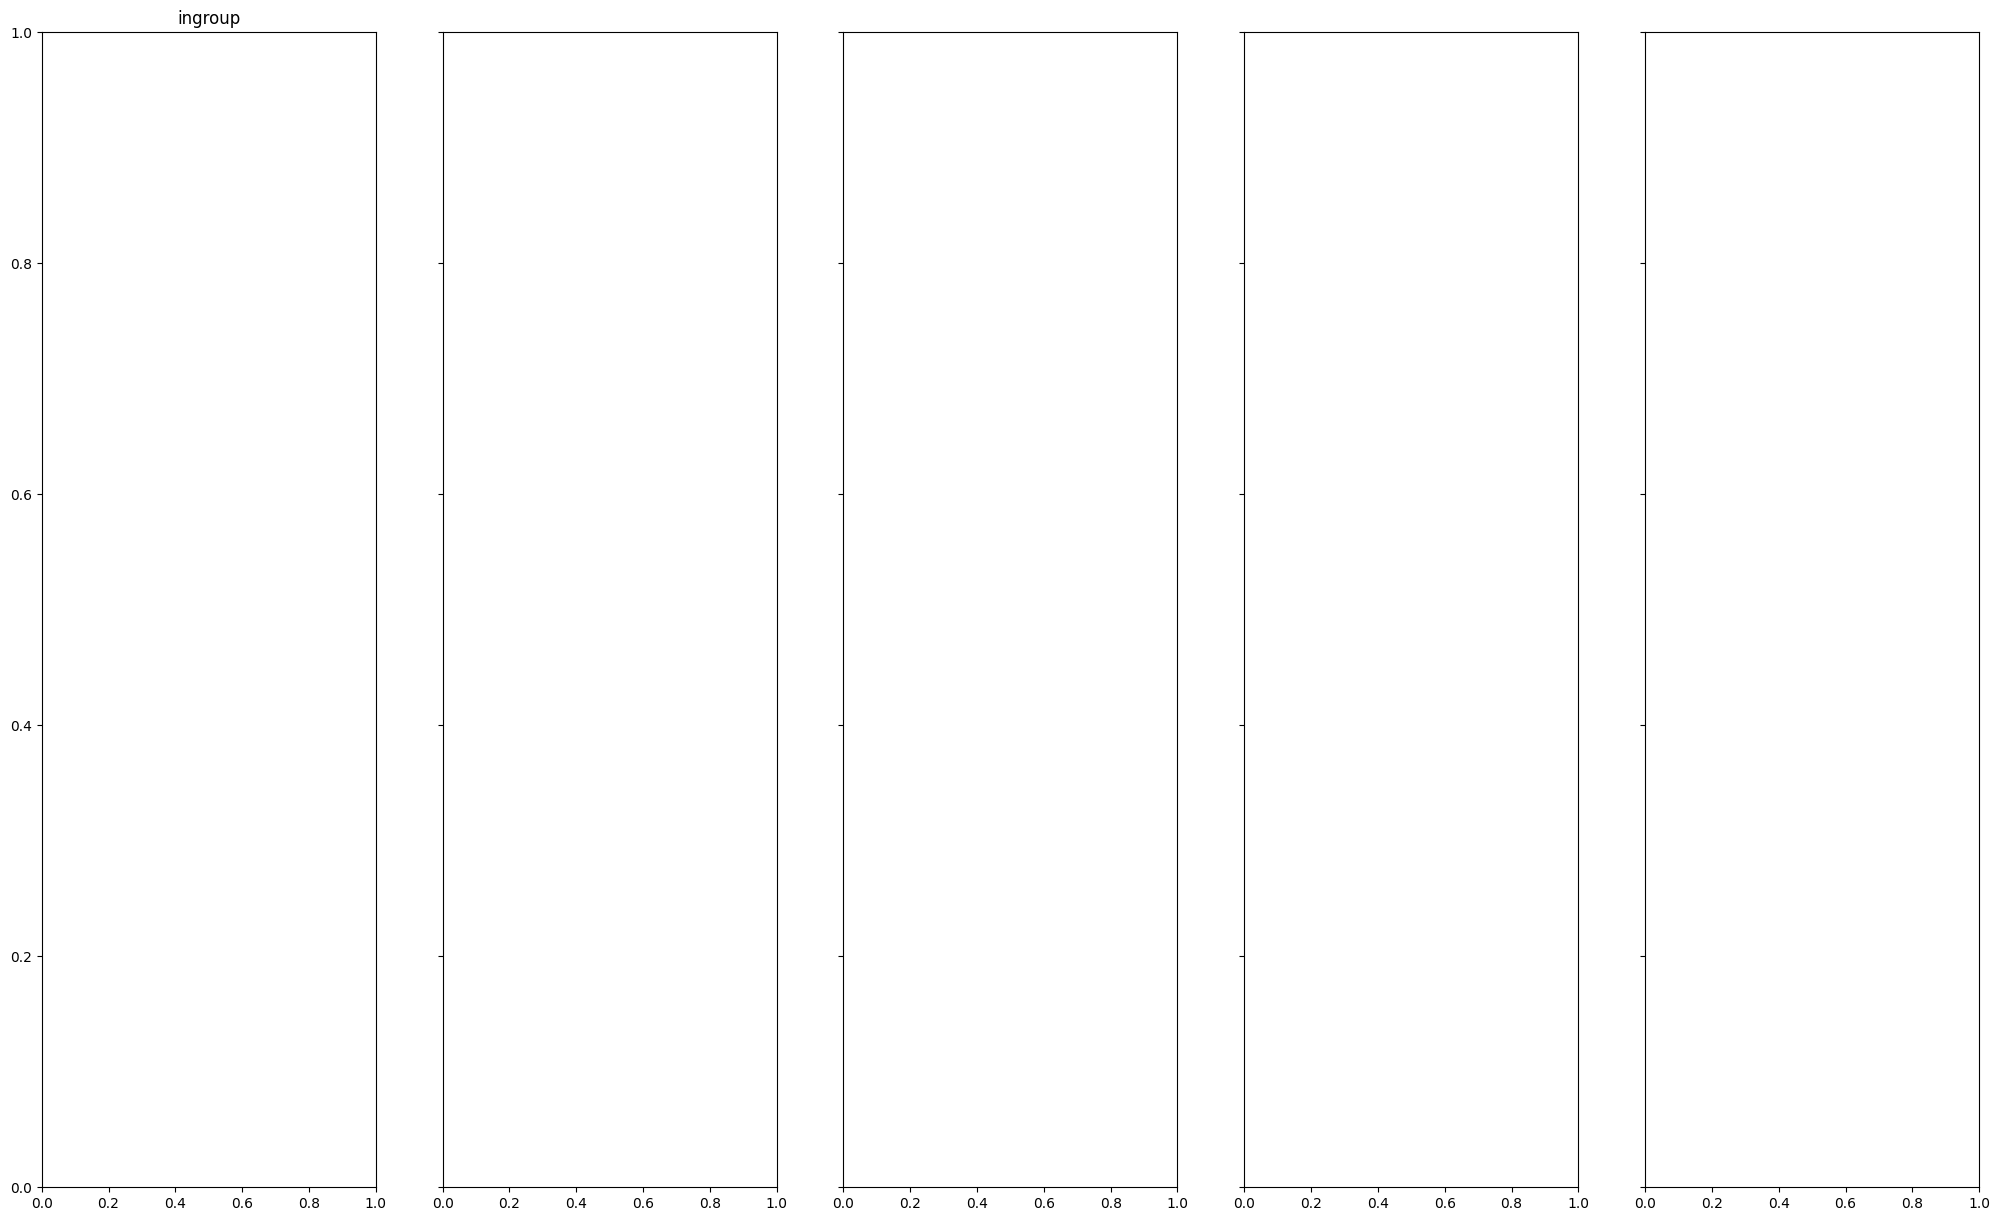

In [25]:
graph_all(ds_p_1, 'deepseek')

/var/folders/9q/49vs25x908l6hq8snfm40n600000gn/T/ipykernel_1612/379003022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'] = pd.Categorical(df['source'], categories=['inherent', 'explicit', 'persona'], ordered=True)
/var/folders/9q/49vs25x908l6hq8snfm40n600000gn/T/ipykernel_1612/379003022.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  fig.legend(f_legend.legendHandles, [t.get_text() for t in f_legend.texts],


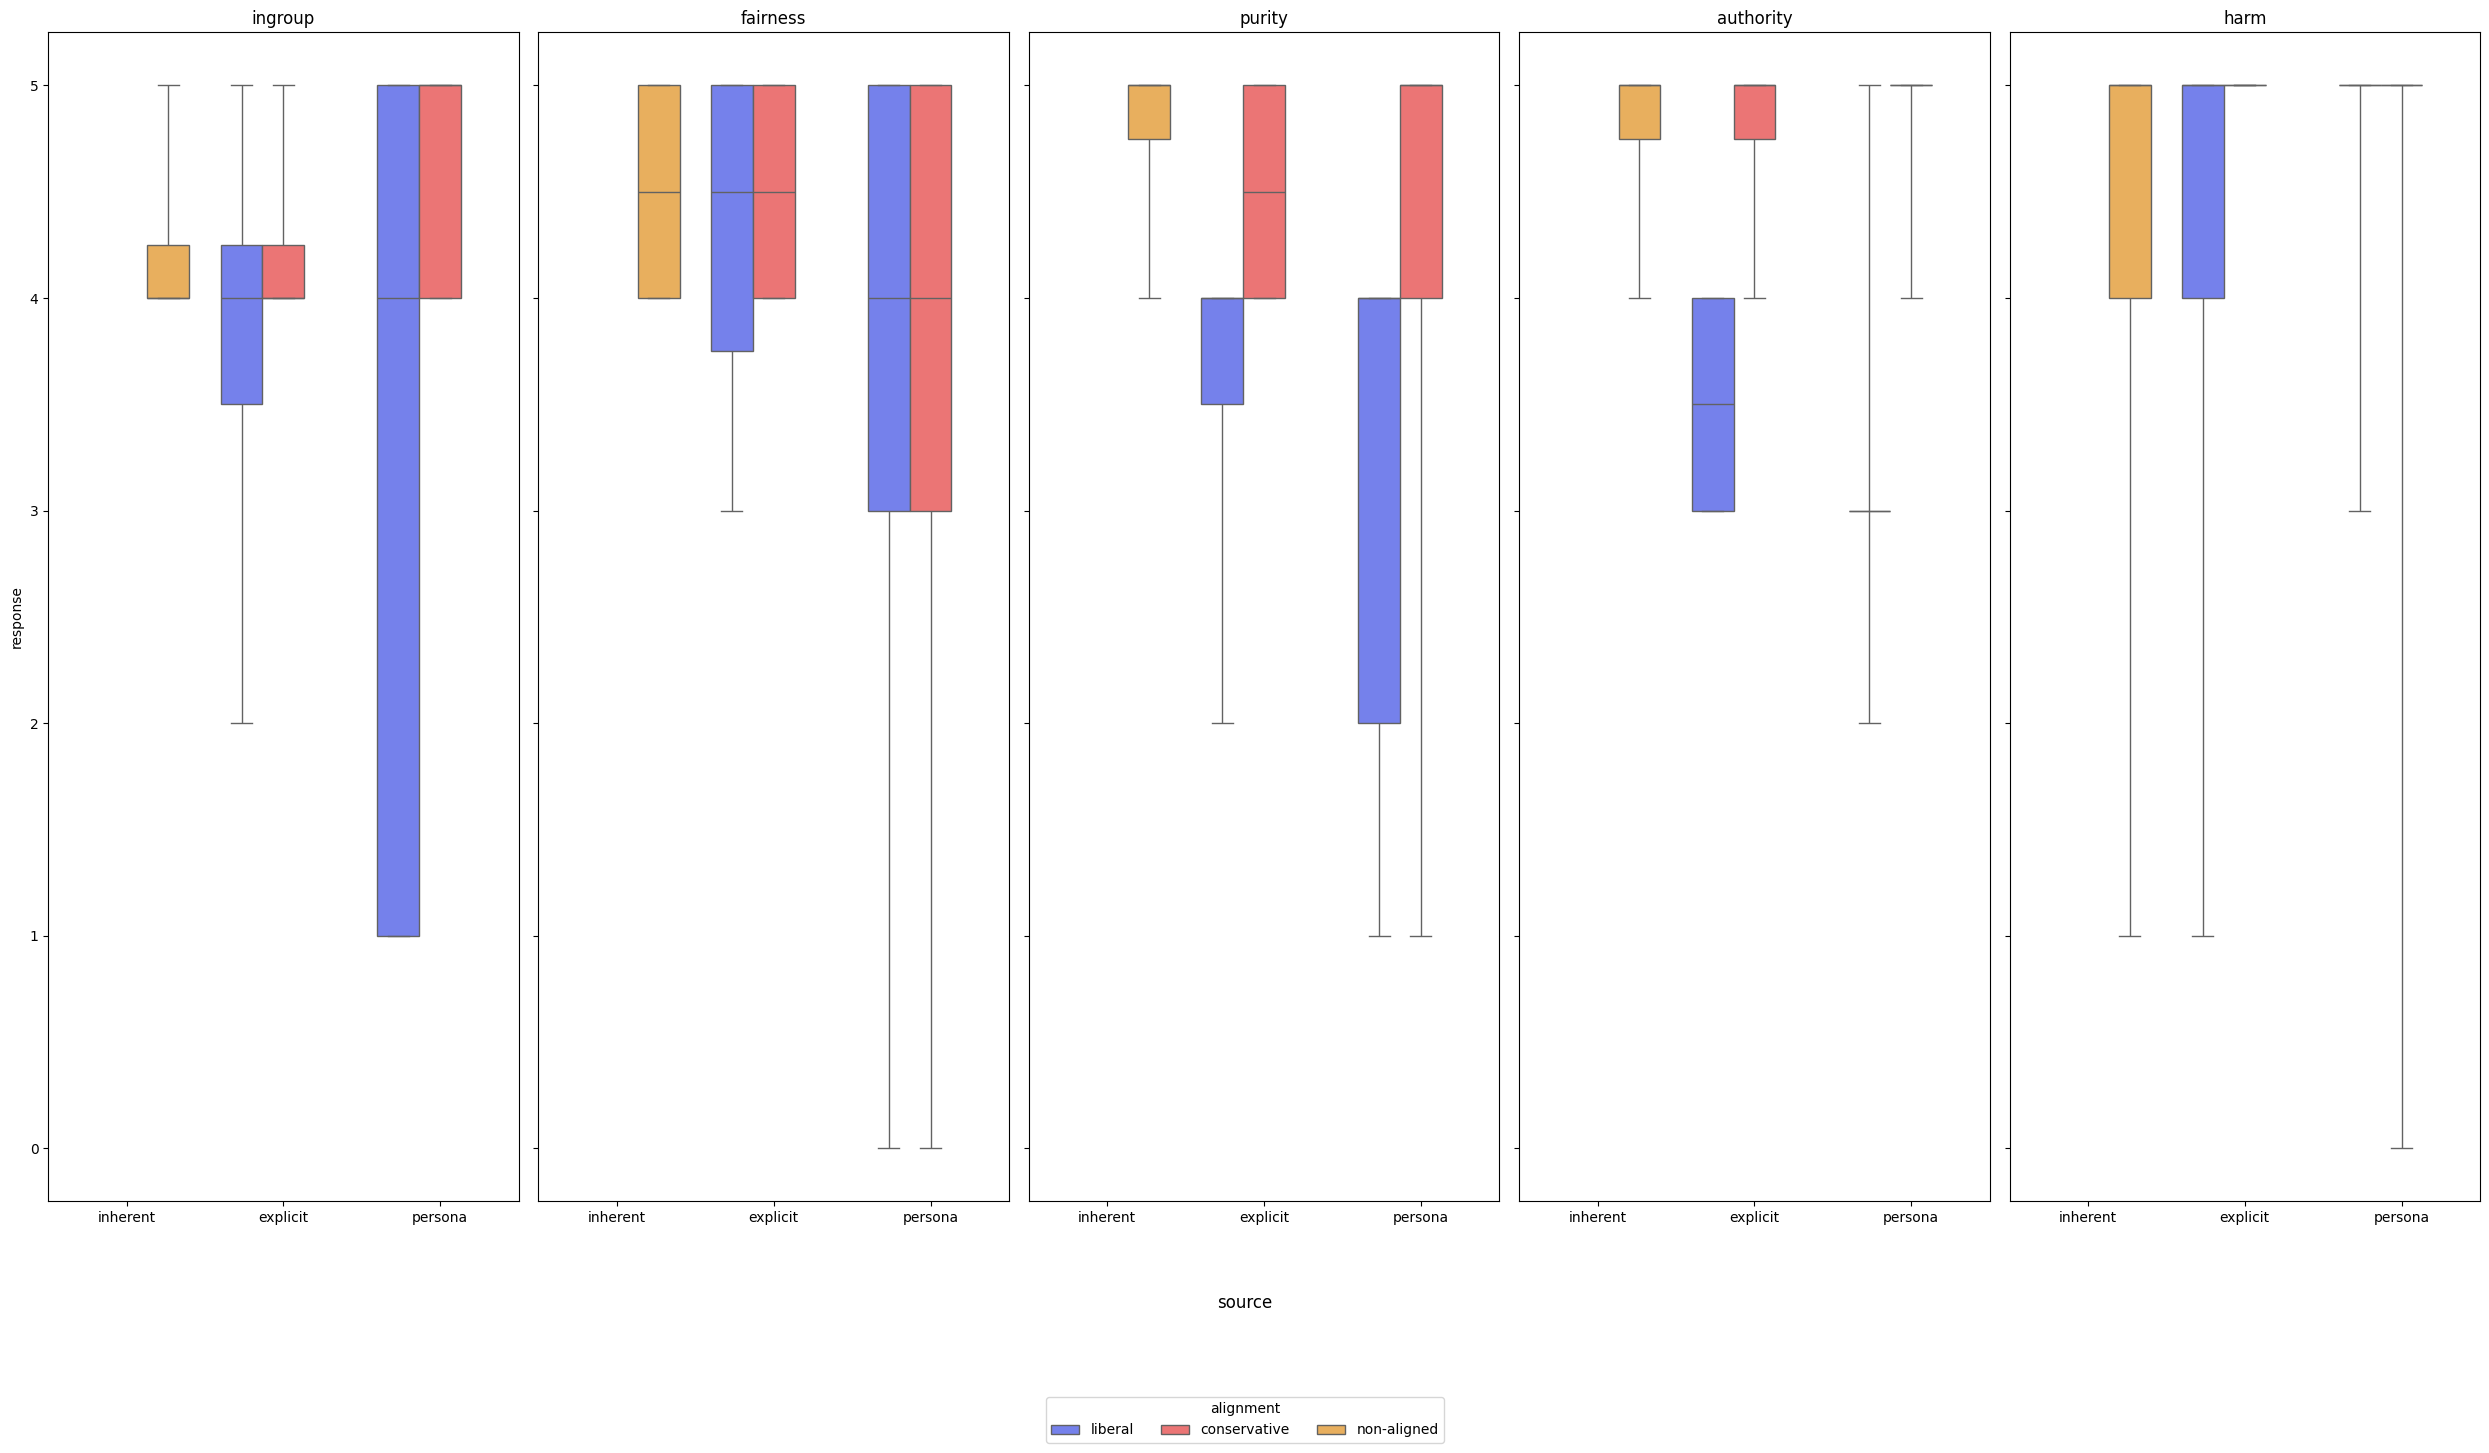

In [ ]:
graph_all(simple_combined, 'vicuna')